In [105]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report


In [29]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",names=["buying","maint","doors","persons","lug_boot","safety","class"])

In [30]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [32]:
df.shape

(1728, 7)

In [33]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [34]:
df.duplicated().sum()

0

In [35]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [36]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [37]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [60]:
import category_encoders as ce

In [61]:
encoder = ce.OrdinalEncoder(cols=["buying","maint","doors","persons","lug_boot","safety","class"])

In [43]:
new_df1=encoder.fit_transform(df)

In [44]:
new_df1

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,4
1724,4,4,4,3,2,3,3
1725,4,4,4,3,3,1,1
1726,4,4,4,3,3,2,4


In [45]:
new_df1.corr()

,buying,maint,doors,persons,lug_boot,safety,class
buying,1.000000e+00,-1.677465e-15,-4.011400e-15,3.012318e-16,1.655368e-16,1.560634e-15,0.286532
maint,-1.677465e-15,1.000000e+00,-7.726330e-16,-1.295015e-16,1.148622e-16,2.582993e-16,0.254656
doors,-4.011400e-15,-7.726330e-16,1.000000e+00,-4.617011e-17,6.080942e-17,9.909683e-17,0.056475
persons,3.012318e-16,-1.295015e-16,-4.617011e-17,1.000000e+00,3.854941e-19,1.002285e-17,0.336842
lug_boot,1.655368e-16,1.148622e-16,6.080942e-17,3.854941e-19,1.000000e+00,7.131641e-18,0.121453
safety,1.560634e-15,2.582993e-16,9.909683e-17,1.002285e-17,7.131641e-18,1.000000e+00,0.402313
class,2.865317e-01,2.546564e-01,5.647481e-02,3.368420e-01,1.214529e-01,4.023127e-01,1.000000


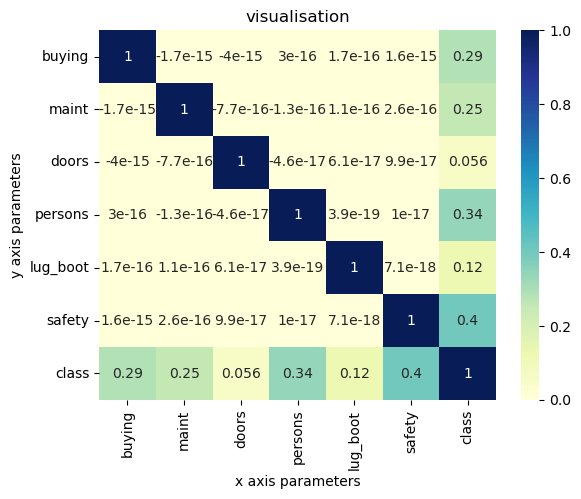

In [46]:

sns.heatmap(new_df1.corr(), annot=True, cmap='YlGnBu')
plt.title("visualisation")
plt.xlabel('x axis parameters')
plt.ylabel('y axis parameters')
plt.show()

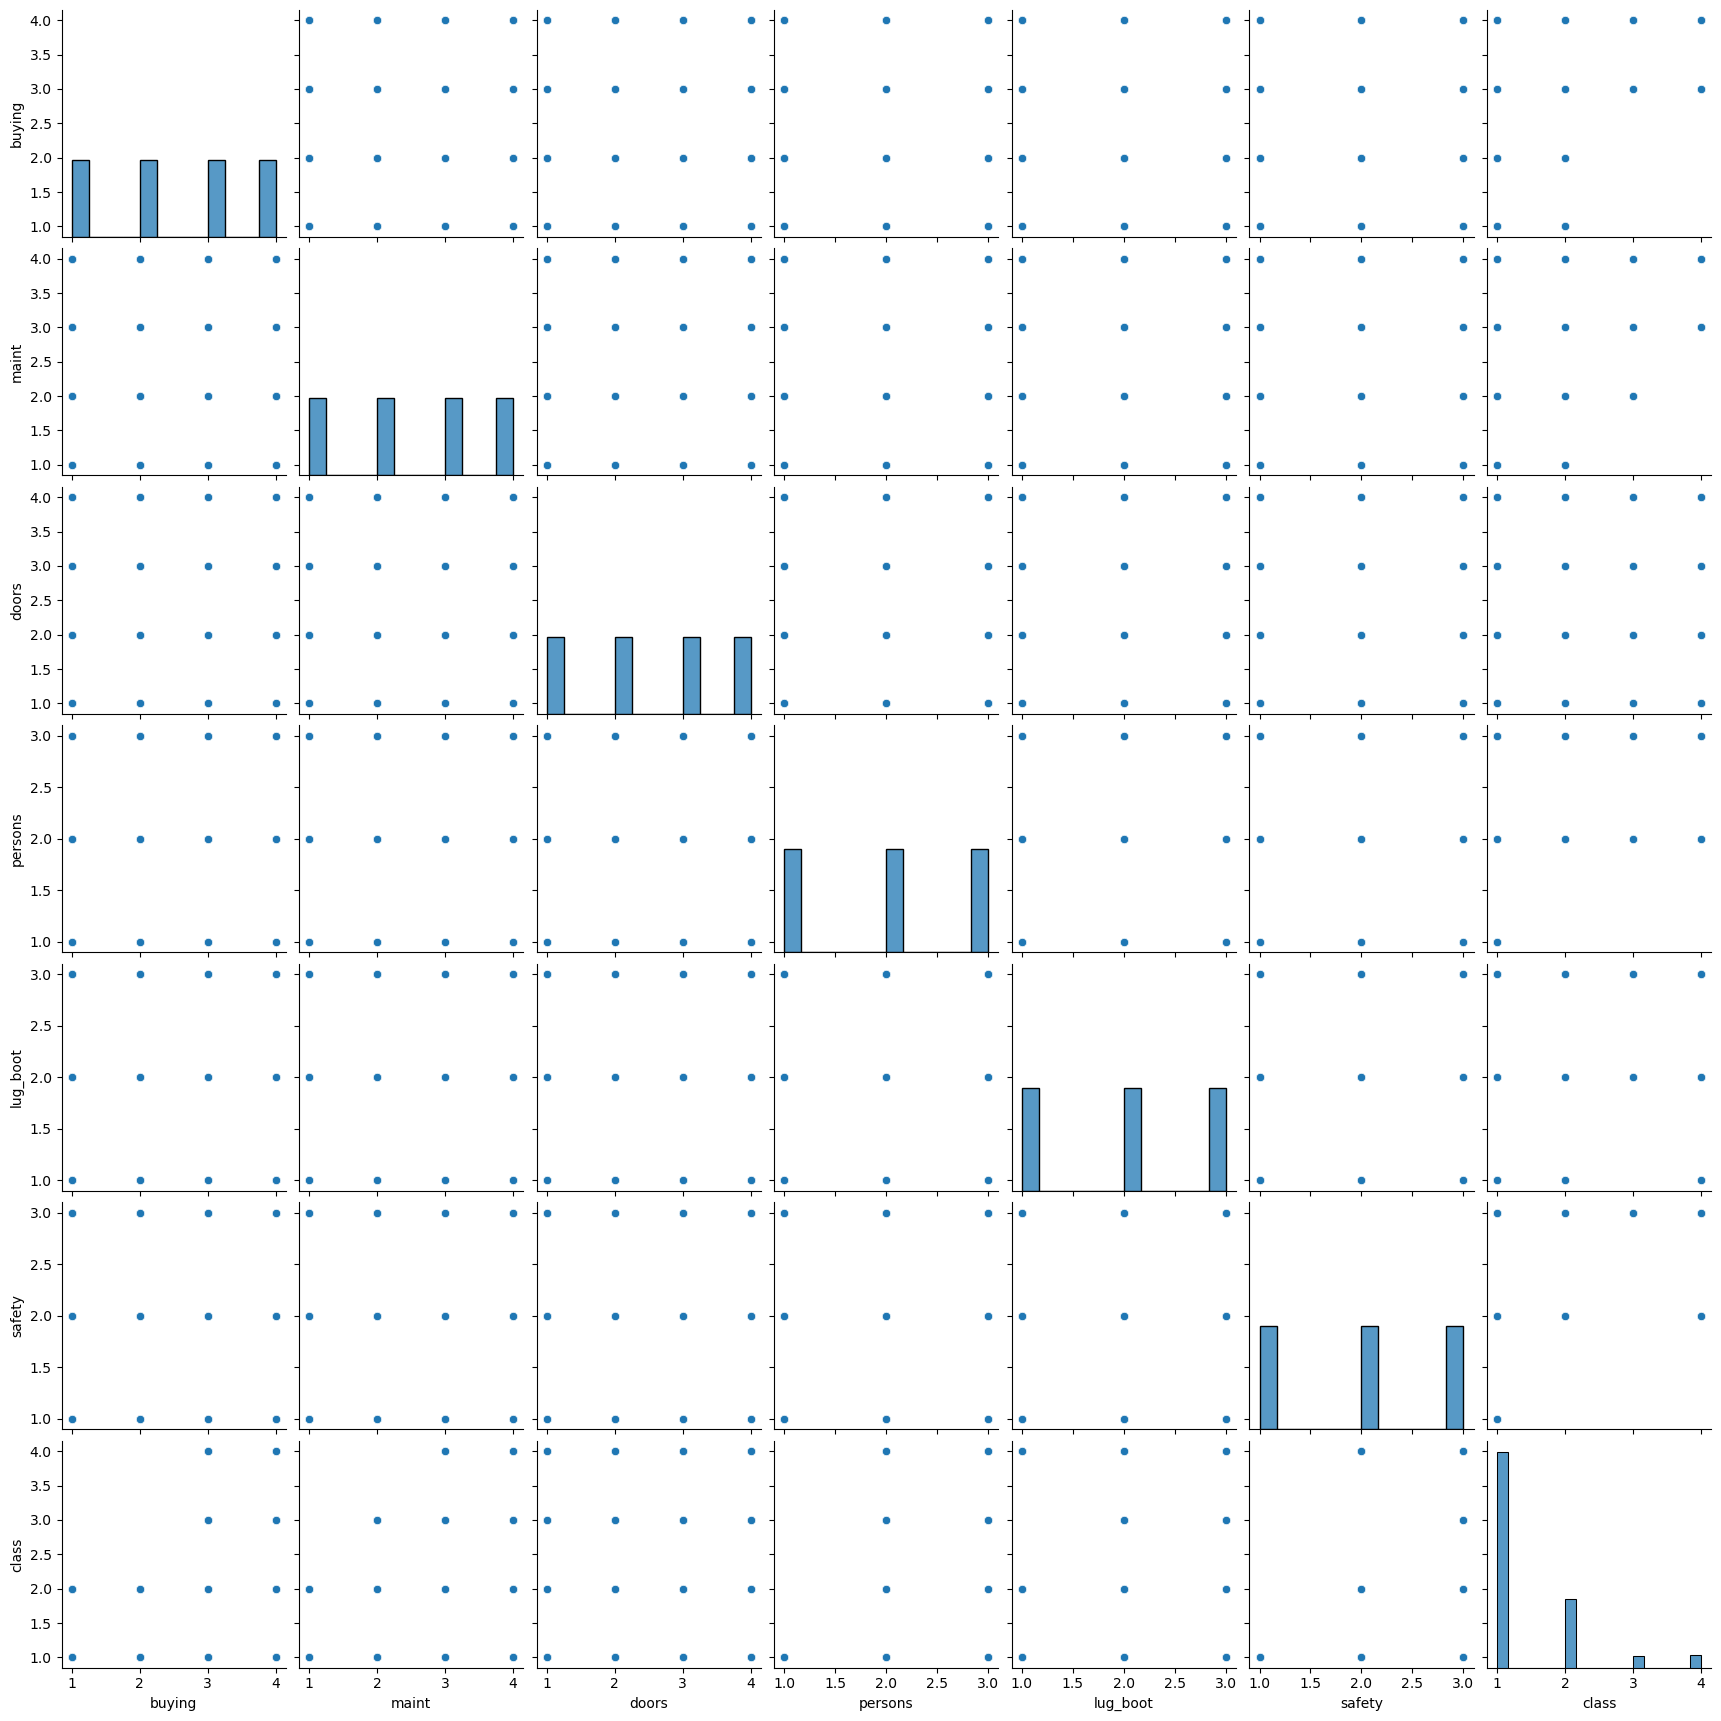

In [47]:
sns.pairplot(new_df1)

In [69]:
x=new_df1.drop(["class"],axis=1)
y=new_df1["class"]

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [72]:
x_train.shape

(1382, 6)

In [73]:
x_test.shape

(346, 6)

In [74]:
y_train.shape

(1382,)

                                                     **DECISION TREE CLASSIFIER**

In [75]:
entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)
entropy.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [76]:
y_pred =entropy.predict(x_test)
y_pred3 = entropy.predict(x_train)

In [77]:
acc1=accuracy_score(y_test,y_pred)


In [78]:
accuracy_score(y_train,y_pred3)

0.7901591895803184

                                                        **RANDOM FOREST CLASSIFIER**

In [79]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(x_train, y_train)
y_pred1 = rf_classifier.predict(x_test)
y_pred2 = rf_classifier.predict(x_train)



In [80]:
acc2=accuracy_score(y_test,y_pred1)

In [81]:
accuracy_score(y_train,y_pred2)

1.0

                                                          **Logistic Regression**

In [82]:
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(x_train, y_train)
y_pred4 = logreg_classifier.predict(x_test)
y_pred5 = logreg_classifier.predict(x_train)


In [83]:
acc3=accuracy_score(y_test, y_pred4)

In [84]:
accuracy_score(y_train,y_pred5)

0.837192474674385

                                                          **KNN CLASSFIER**

In [85]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)
y_pred6 = knn_classifier.predict(x_test)
y_pred7 = knn_classifier.predict(x_train)


In [86]:
acc4=accuracy_score(y_test, y_pred6)

In [87]:
accuracy_score(y_train,y_pred7)

0.9500723589001447

                                                         **NAIVE BAYES CLASSIFIER**

In [88]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train, y_train)
y_pred8 = naive_bayes_classifier.predict(x_test)
y_pred9= naive_bayes_classifier.predict(x_train)

In [89]:
acc5=accuracy_score(y_test, y_pred8)

In [90]:
accuracy_score(y_train,y_pred9)

0.7127351664254703

                                                        **SVM**

In [91]:
svm_classifier = SVC(kernel='poly')
svm_classifier.fit(x_train, y_train)
y_pred10 = svm_classifier.predict(x_test)
y_pred11 = svm_classifier.predict(x_train)


In [92]:
acc6=accuracy_score(y_test, y_pred10)

In [93]:
accuracy_score(y_train,y_pred11)

0.9782923299565847

In [94]:
max_acc=max(acc1,acc2,acc3,acc4,acc5,acc6)

In [95]:
print(f"Maximum accuracy obtained is {max_acc *100}%")

Maximum accuracy obtained is 97.97687861271676%


In [96]:
precision = precision_score(y_test, y_pred10,average="macro")

In [97]:
precision

0.9463749116991795

In [98]:
recall = recall_score(y_test,y_pred10, average='macro')


In [99]:
recall

0.9768459915611815

In [100]:
f1 = f1_score(y_test, y_pred10, average='macro')

In [101]:
f1

0.9600506440276795

In [103]:
cm = confusion_matrix(y_test, y_pred10)

In [104]:
cm

array([[236,   4,   0,   0],
       [  3,  73,   0,   3],
       [  0,   0,  10,   0],
       [  0,   0,   0,  17]])

In [106]:
classification_rep = classification_report(y_test,y_pred10)

In [109]:
print(classification_rep)

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       240
           2       0.95      0.92      0.94        79
           3       1.00      1.00      1.00        10
           4       0.85      1.00      0.92        17

    accuracy                           0.97       346
   macro avg       0.95      0.98      0.96       346
weighted avg       0.97      0.97      0.97       346



                                                       ATTRIBUTE DESCRIPTION

The dataset consists of six attributes (features) and one target variable (class label).

1.Buying Price:  It represents the buying price of the car.

2.Maintenance Price:It indicates the estimated maintenance cost of the car.

3.Number of Doors: It represents the number of doors in the car.

4.Capacity:  It indicates the passenger capacity or seating capacity of the car

5.Luggage Capacity: It represents the size of the luggage compartment in the car.

6.Safety: It indicates the safety rating of the car.

7.Class Label (Target):It is a categorical attribute indicating the acceptability level of the car.